# HR analytics: Predict who is looking for a new job

#### Independent Variables
enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed


#### Target Variable

target: 0 – Not looking for job change, 1 – Looking for a job change

Predict the probability of a candidate will work for the company

Interpret model(s) such a way that illustrate which features affect candidate decision

## Download and read data
#### Importing necessary libraries are used to run this project :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from matplotlib.pyplot import figure

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) #
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [167]:
df2 = pd.read_csv('/Users/ghaidaa/Downloads/archive-2/aug_test.csv')


In [168]:
df2.shape

(2129, 13)

In [169]:
df = pd.read_csv('/Users/ghaidaa/Downloads/archive-2/aug_train.csv')

In [170]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


### Divide the data into two training and validation groups :

In [171]:
# create X (features) and y (response)
df.drop(['enrollee_id',"city"],axis='columns', inplace=True)
X_data = df.drop(columns='target')
y_data= df['target']




In [172]:
X_data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,never,52
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8
...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,1,42
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,4,52
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,4,44
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,2,97


In [173]:
X_data.shape

(19158, 10)

In [174]:
y_data.shape

(19158,)

In [175]:
y_data=y_data.astype(int)

In [176]:
X_data.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'last_new_job', 'training_hours'],
      dtype='object')

In [177]:
print("DUPLICATED VALUES:\n")
print(X_data.duplicated().sum())

DUPLICATED VALUES:

118


In [178]:
print("NAN VALUES:\n")
print(X_data.isna().sum())

NAN VALUES:

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
last_new_job               423
training_hours               0
dtype: int64


In [179]:
X_data.describe()

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [180]:
X_data.nunique()#  function return number of unique elements in the object.

city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
last_new_job                6
training_hours            241
dtype: int64

In [181]:
print("Value of city development index :\n")
print(X_data["city_development_index"].value_counts())

Value of city development index :

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.824       4
0.807       4
0.625       3
0.781       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64


In [182]:
print("Value of gender  :\n")
print(X_data['gender'].value_counts())

Value of gender  :

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


In [183]:
print("Value of relevent experience  :\n")
print(X_data["relevent_experience"].value_counts())

Value of relevent experience  :

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


In [184]:
print("Value of major discipline:\n")
print(X_data["major_discipline"].value_counts())

Value of major discipline:

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


In [185]:
print("Value target:\n")
print(y_data.value_counts()) # we have imbalance

Value target:

0    14381
1     4777
Name: target, dtype: int64


In [186]:
print("Value of training_hours:\n")
print(X_data["training_hours"].value_counts())

Value of training_hours:

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
286      5
272      5
234      5
238      4
Name: training_hours, Length: 241, dtype: int64


In [187]:
print("Value of last new job:\n")
print(X_data["last_new_job"].value_counts())

Value of last new job:

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64


In [188]:
print("Value of company type :\n")
print(X_data["company_type"].value_counts())

Value of company type :



KeyError: 'company_type'

In [189]:
print("Value of company size :\n")
print(X_data["company_size"].value_counts())

Value of company size :

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


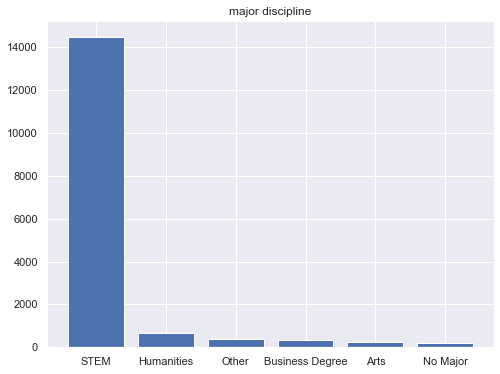

In [190]:
figure(figsize=(8, 6))
mar_stat=X_data['major_discipline'].value_counts()
plt.bar(mar_stat.index,mar_stat)
plt.title('major discipline');

In [191]:
fig = px.pie(X_data['relevent_experience'].value_counts(), values='relevent_experience', 
     names = X_data['relevent_experience'].value_counts().index,title = 'Relevent Experience',template='ggplot2')
fig.show()

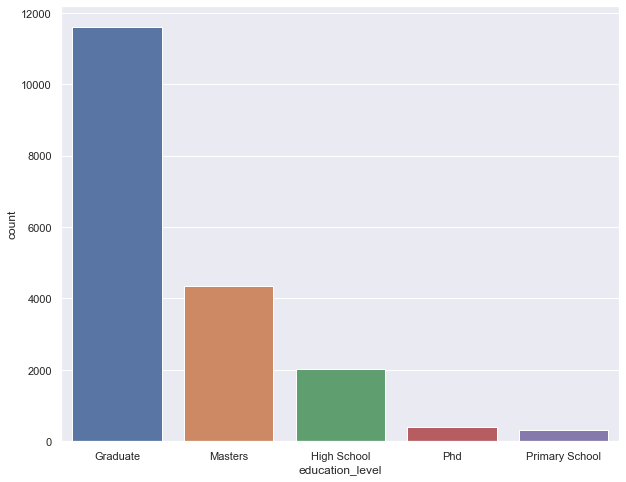

In [192]:
figure(figsize=(10, 8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="education_level", data=X_data)

In [193]:

fig = px.pie(X_data['gender'].value_counts(), values='gender', names = X_data['gender'].value_counts().index,title = 'gender',template='ggplot2')
fig.show()

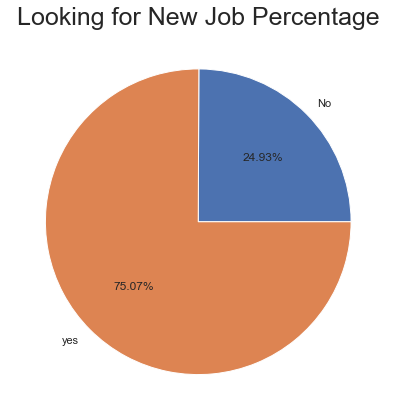

In [194]:
sizes = list(y_data.value_counts().sort_values().values)
#sizes = list(y_data.value_counts().sort_values().index)

labels = ['No', 'yes']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct=lambda p:f'{p:.2f}%')
plt.title('Looking for New Job Percentage', fontsize=25)
plt.tight_layout()
plt.show()

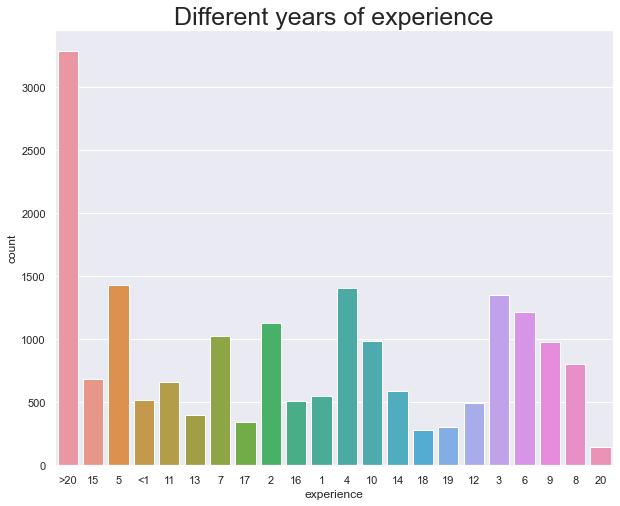

In [195]:
figure(figsize=(10, 8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="experience", data=X_data)
plt.title('Different years of experience', fontsize=25);

### 1) Missing values

In [196]:
X_data.sample(20)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours
14416,0.624,Male,No relevent experience,Full time course,Graduate,STEM,<1,NaN,never,9
6048,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,7,1000-4999,1,15
4337,0.920,NaN,Has relevent experience,NaN,Graduate,STEM,3,<10,1,87
18076,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,10000+,>4,28
6164,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,14
12994,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,NaN,never,123
14264,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,9,NaN,2,8
9784,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,16,1000-4999,1,13
15917,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,>4,76
3316,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,>4,28


In [197]:
missing = pd.DataFrame(X_data.isnull().sum()/len(df), columns=['Missing'])

cm = sns.light_palette("green", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing
city_development_index,0.000000
gender,0.235306
relevent_experience,0.000000
enrolled_university,0.020148
education_level,0.024011
major_discipline,0.146832
experience,0.003393
company_size,0.309949
last_new_job,0.022080
training_hours,0.000000


In [198]:
# fill missing value in numric column 
X_data["experience"].replace({np.NaN:0,">20":22,"<1":0},inplace=True)
X_data["last_new_job"].replace({np.NaN:0,">4":5,"never":0},inplace=True)
X_data["company_size"].replace({np.NaN:0},inplace=True)



X_data["experience"] = X_data["experience"].astype(int)
X_data["last_new_job"] = X_data["last_new_job"].astype(int)


In [199]:
X_data['last_new_job'].value_counts()

1    8040
5    3290
2    2900
0    2875
4    1029
3    1024
Name: last_new_job, dtype: int64

In [200]:
#X_data = X_data['last_new_job'].fillna('0')
X_data['company_type'].fillna('Unknown',inplace=True)
X_data['major_discipline'].fillna('other',inplace=True)

KeyError: 'company_type'

In [115]:
X_data.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [116]:
for column in ['gender','enrolled_university','education_level']:
    X_data[column].fillna(X_data[column].mode()[0], inplace=True)

In [117]:
missing = pd.DataFrame(X_data.isnull().sum()/len(df), columns=['Missing'])

cm = sns.light_palette("green", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing
city_development_index,0.000000
gender,0.000000
relevent_experience,0.000000
enrolled_university,0.000000
education_level,0.000000
major_discipline,0.000000
experience,0.000000
company_size,0.000000
company_type,0.000000
last_new_job,0.000000


In [118]:
#X_data.drop(X_data.loc[X_data['gender']=='Other'].index, inplace=True)

In [119]:
#y_data['last_new_job'].fillna('Not provided',inplace=True)
#y_data['company_size'].fillna(y_data['company_size'].mean,inplace=True)
#y_data['company_type'].fillna('Unknown',inplace=True)
#y_data['major_discipline'].fillna('other',inplace=True)

In [120]:
#for column in ['gender','enrolled_university','education_level']:
#y_data[column].fillna(data_val[column].mode()[0], inplace=True)

In [121]:
#y_data.drop(y_data.loc[y_data['gender']=='Other'].index, inplace=True)

In [122]:
y_data.isna().sum()

0

In [123]:
X_data.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [124]:
import sys
print(sys.getrecursionlimit())

3000


In [125]:
X_data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,22,0,Unknown,1,36
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,0,Unknown,0,83
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,0,Pvt Ltd,0,52
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,22,50-99,Funded Startup,4,8


In [126]:
X_data.sample(30)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
13674,0.624,Male,No relevent experience,Full time course,High School,other,7,0,Unknown,0,94
9297,0.766,Male,Has relevent experience,Full time course,Graduate,STEM,4,50-99,Pvt Ltd,2,92
111,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,<10,Pvt Ltd,1,36
14828,0.550,Male,Has relevent experience,Part time course,Graduate,STEM,10,500-999,Pvt Ltd,1,62
10042,0.848,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,0,86
11313,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,9,0,Unknown,5,27
7031,0.682,Female,Has relevent experience,no_enrollment,Graduate,Other,22,0,Unknown,2,63
17950,0.903,Male,No relevent experience,no_enrollment,Graduate,other,0,0,Unknown,0,84
5717,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,500-999,Funded Startup,4,18
4259,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,<10,Pvt Ltd,1,10


### 2) Data Preprocessing & Feature Engineering  :

In [127]:
def company_size_normal(x):
    
    if x == "<10":
        return "LOCAL"
    elif x == "50-99" or x == "10/49":
        return "SMALL"
    elif x == "100-500":
        return "MEDIUM_SCALE"
    elif x == "500-999":
        return "UPPER_SCALE"
    elif x == "1000-4999" or x == "5000-9999":
        return "EXTENDED"
    elif x == "10000+":
        return "LARGE_SCALE"

In [128]:
X_data["company_size"] = X_data["company_size"].apply(lambda x: company_size_normal(x))

In [129]:
X_data["company_size"].value_counts()

SMALL           4554
MEDIUM_SCALE    2571
LARGE_SCALE     2019
EXTENDED        1891
LOCAL           1308
UPPER_SCALE      877
Name: company_size, dtype: int64

In [130]:
def last_new_job_normal(x):
    if x == 0:
        return "NEVER"
    elif 0 < x <= 2:
        return "LITTLE_TIME"
    elif x > 2:
        return "WAITING_TOO_MUCH"
    else:
        pass

In [131]:
X_data["last_new_job"] = X_data["last_new_job"].apply(lambda x: last_new_job_normal(x))

In [132]:
X_data["last_new_job"].value_counts()

LITTLE_TIME         10940
WAITING_TOO_MUCH     5343
NEVER                2875
Name: last_new_job, dtype: int64

In [133]:
def experience_normal(x):
    
    if x == 0:
        return 0
    elif 0 < x <= 3:
        return "JUNIOR"
    elif 3 < x <= 7:
        return "MIDDLE_EXPERIENCE"
    elif 7 < x <= 15:
        return "SENIOR"
    elif x > 15:
        return "DOMINATE_BUSINESS"

In [134]:
X_data["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [135]:
X_data["experience"] = X_data["experience"].apply(lambda x: experience_normal(x))


In [136]:
X_data["relevent_experience"].replace({"Has relevent experience":"YES","No relevent experience":"NO"},inplace=True)

In [137]:
#figure = plt.figure(figsize=(15,8))

#sns.histplot(x=X_data["experience"],hue=y_data,multiple="stack",edgecolor=".3",linewidth=.5)

#plt.title("EXPERIENCE-TARGET")
#plt.tight_layout()
#plt.show()

In [138]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     19158 non-null  object 
 4   education_level         19158 non-null  object 
 5   major_discipline        19158 non-null  object 
 6   experience              19158 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            19158 non-null  object 
 9   last_new_job            19158 non-null  object 
 10  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


<AxesSubplot:>

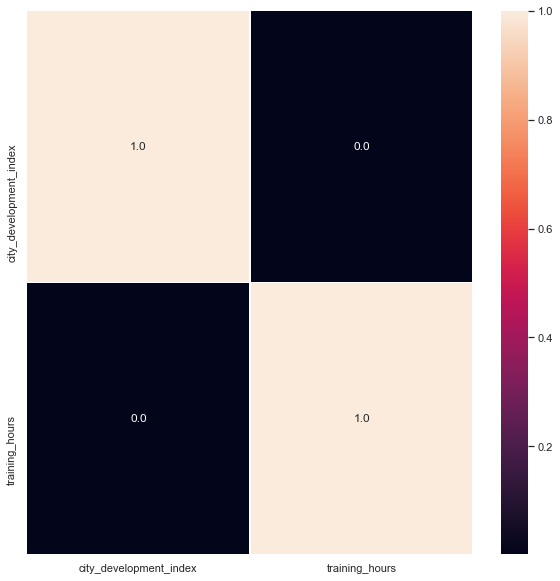

In [139]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(X_data.corr(),annot=True,linewidth=.5,fmt='.1f')

In [140]:
X_data.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [141]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     19158 non-null  object 
 4   education_level         19158 non-null  object 
 5   major_discipline        19158 non-null  object 
 6   experience              19158 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            19158 non-null  object 
 9   last_new_job            19158 non-null  object 
 10  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


In [164]:

X_data['gender'] = X_data['gender'].map({'Male': 1,'Female':2,'Other':0})
X_data['major_discipline'] = X_data['major_discipline'].map({'STEM':0, 'Business Degree':1,'Arts':2, 'Humanities':3, 'No Major':4,'Other':4 }) 

       
X_data['last_new_job'] = X_data['last_new_job'].map({'NEVER': '0','LITTLE_TIME':'1','WAITING_TOO_MUCH':'2'})
X_data['company_size'] = X_data['company_size'].map({'None':0,'LOCAL': 1,'SMALL':1,'MEDIUM_SCALE':2,'UPPER_SCALE':3,'EXTENDED':4,'LARGE_SCALE':5})
X_data['relevent_experience'] = X_data['relevent_experience'].map({'NO': 0,'YES':1})
X_data['enrolled_university'] = X_data['enrolled_university'].map({'Full time course': 2,'Part time course':1,'no_enrollment':0})
X_data["experience"] = X_data['experience'].map({'DOMINATE_BUSINESS':3,'SENIOR':2,'MIDDLE_EXPERIENCE':1, 0:0, 'JUNIOR':1}) 





In [165]:
X_data["experience"].unique()

array([3, 2, 1, 0])

### 3) Preprocessing using LabelEncoder :

In [202]:

data=X_data.copy()
data.drop(['company_type'],axis='columns', inplace=True)



KeyError: "['company_type'] not found in axis"

In [156]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [158]:
for col in X_data.columns:
    X_data[col] = enc.fit_transform(X_data[col])


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [72]:
from imblearn.over_sampling import SMOTE
import imblearn.over_sampling


#n_pos = np.sum(y_data == 1)
#n_neg = np.sum(y_data == 0)
#ratio = {1 : n_pos *3 , 0 : n_neg}

#smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
#X_tr_smote, y_tr_smote = smote.fit_resample(X_data, y_data)
#smote=SMOTE(random_state=60)
#X_data, y_data=smote.fit_resample(X_data, y_data)

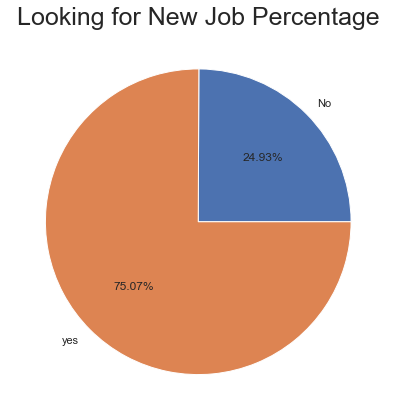

In [73]:
sizes = list(y_data.value_counts().sort_values().values)
#sizes = list(y_data.value_counts().sort_values().index)

labels = ['No', 'yes']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct=lambda p:f'{p:.2f}%')
plt.title('Looking for New Job Percentage', fontsize=25)
plt.tight_layout()
plt.show()

In [74]:
ss = StandardScaler()
ss.fit(X_data)
x_train = ss.transform(X_data)


ValueError: could not convert string to float: 'Graduate'

In [ ]:
X_data.head()

In [ ]:
y_data.head()

In [ ]:
for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

        # Upsample only the data in the training section
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)

## Baseline model -KNN- :

In [ ]:
X_train, X_test, label_train, label_val  = train_test_split(X_data, y_data ,random_state=45)


In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 10))
L_range = list(range(100,200))
print(k_range)
print(L_range)
param_grid = dict(n_neighbors=k_range)
param_grid_logistic = {'classifier__C':[0.001, 0.01,1, 10, 100, 1000]}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
grid_Knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_Knn.fit(X_train, label_train)

print("The score for kNN is")
print("Training: {:6.2f}%".format(100*grid_Knn.score(X_train, label_train)))
print("Valid set: {:6.2f}%".format(100*grid_Knn.score(X_val, label_val)))

In [ ]:
knn_confusion = confusion_matrix(label_val, grid_Knn.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Yes', 'No'],
           yticklabels=['Yes', 'No'], fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix');

 ## LogisticRegression Classifier

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification



X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    stratify=y_data,
                                                    random_state=11)


pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier',RandomForestClassifier()]])
    
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

### Confusion matrics

In [ ]:
knn_confusion = confusion_matrix(label_val, grid_search.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Yes', 'No'],
           yticklabels=['Yes', 'No'], fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix');

## K Neighbors Classifier

In [ ]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier',KNeighborsClassifier(n_neighbors=5)]])
    
param_grid = {'n_neighbors':[1,2,3,4,5]}
grid_search_Knn = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

## Decision tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


decisiontree = DecisionTreeClassifier(max_depth=4)


In [ ]:


stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid_search_D = GridSearchCV(estimator=decisiontree,
                           param_grid=tree_para,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_D.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

## Confusion Matrics 

In [ ]:
knn_confusion = confusion_matrix(label_val, grid_search_D.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Yes', 'No'],
           yticklabels=['Yes', 'No'], fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix');

In [ ]:
from sklearn import tree
#tree.plot_tree(decisiontree)

## Random forest classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier


pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', RandomForestClassifier()]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

## Ensampling - voting classifier


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 
#Models

#logit = LogisticRegression(C = 0.5)
grid_Kn= GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
forest = RandomForestClassifier(max_depth=32, n_estimators= 2250, class_weight = {0:0.7, 1:0.3})
#decisiontree = DecisionTreeClassifier(max_depth=4)

#voting classfier train 

voting = VotingClassifier(estimators=[('Lr',grid_search),('Forest',forest),('tree',grid_search_D)],voting='hard')
voting = voting.fit(X_train, label_train)

#voting classfier validation 

#voting = VotingClassifier(estimators=[('Lr',logit),('Forest',forest),('tree',decisiontree),('knn',grid_Knn)],voting='hard')
#voting = voting.predict(X_val)

print("Training : {:6.2f}%".format(100*voting.score(X_train, label_train)))
print("validation : {:6.2f}%".format(100*voting.score(X_val, label_val)))



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
# generate 2 class dataset
knn = KNeighborsClassifier(n_neighbors=5)
scores1 = []
#X, y = make_classification(n_samples=65425, n_classes=2, weights=[0.99, 0.01], flip_y=0, random_state=1)
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
kfold = KFold(n_splits=5)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
# select rows
train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
#print(train_X.shape, train_y.shape)
#print(test_X.shape, test_y.shape)
oversample = SMOTE(random_state = 0)
train_X, train_y = oversample.fit_resample(train_X, train_y)
#scores= cross_val_score(knn, test_X, test_y, cv=5, scoring='accuracy') 
knn.fit(train_X, train_y)
y_pred =knn.predict(test_X)
scores = accuracy_score(test_y,y_pred)
scores1.append(scores)
print("kNN score: \t")
print(scores1)
print("----------------")
conf_mat = confusion_matrix(test_y, y_pred)
print("kNN confusion matrix: \n",conf_mat)
print("----------------")
print("KNN precision score")
print((precision_score(test_y, y_pred)))
print("----------------")
print("KNN recall_score")
print(recall_score(test_y, y_pred))
print("----------------")
print("KNN F1")
print(f1_score(test_y, y_pred))